In [3]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [4]:
from keras.datasets import cifar10, mnist, fashion_mnist
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test) = fashion_mnist.load_data()

In [5]:
class TestCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        logs['test_accuracy'] = acc
        
result_dic = {"epochs": []}

json_logging_callback = tf.keras.callbacks.LambdaCallback(
                on_epoch_end=lambda epoch, logs:
                result_dic["epochs"].append({
                    'epoch': epoch + 1, 
                    'acc': str(logs['accuracy']), 
                    'val_acc': str(logs['val_accuracy']),
                    'test_acc': str(logs['test_accuracy'])
                }))

In [6]:
model_cifar10 = tf.keras.Sequential([
    tf.keras.layers.Resizing(28,28,interpolation="bilinear"),
    tf.keras.Input(shape = (28,28,1)),

       tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = "same" ,
                           activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2) , padding = "valid" ) ,

    tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3) , strides = (1,1) , padding = "same" ,
                           activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2) , padding = "valid" ) ,
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dropout(0.5), 

    tf.keras.layers.Dense(10, activation='softmax')

])
model_cifar10.compile(loss="categorical_crossentropy" ,
                      optimizer = tf.optimizers.SGD(learning_rate=0.002 , momentum=0.9),
                      metrics = ['accuracy'])


In [7]:
enc = OneHotEncoder(sparse=False)
cifar10_y_train_enc = enc.fit_transform(cifar10_y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
his_cifar10 = model_cifar10.fit(cifar10_x_train , cifar10_y_train_enc , epochs=50 ,
                  validation_split=0.1 , callbacks=[TestCallback((cifar10_x_test,
                                                                  enc.fit_transform( cifar10_y_test))),
                                                     json_logging_callback])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
1407/1407 [==============================] - 19s 6ms/step - loss: 1.8061 - accuracy: 0.3386 - val_loss: 1.4531 - val_accuracy: 0.4744 - test_accuracy: 0.4643
Epoch 2/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5147 - accuracy: 0.4591 - val_loss: 1.3371 - val_accuracy: 0.5222 - test_accuracy: 0.5118
Epoch 3/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3624 - accuracy: 0.5202 - val_loss: 1.1847 - val_accuracy: 0.5836 - test_accuracy: 0.5692
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2361 - accuracy: 0.5711 - val_loss: 1.1883 - val_accuracy: 0.5982 - test_accuracy: 0.5854
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1370 - accuracy: 0.6064 - val_loss: 1.0306 - val_accuracy: 0.6446 - test_accuracy: 0.6332
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0493 - accuracy: 0.6368 - val_loss: 1.0539 - val_accuracy: 0.6324 - test_accurac

In [9]:
_, acc_cifar10 = model_cifar10.evaluate(cifar10_x_test, enc.fit_transform(cifar10_y_test))
print(acc_cifar10)

  1/313 [..............................] - ETA: 6s - loss: 0.7452 - accuracy: 0.9375

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step - loss: 1.3573 - accuracy: 0.7429
0.742900013923645


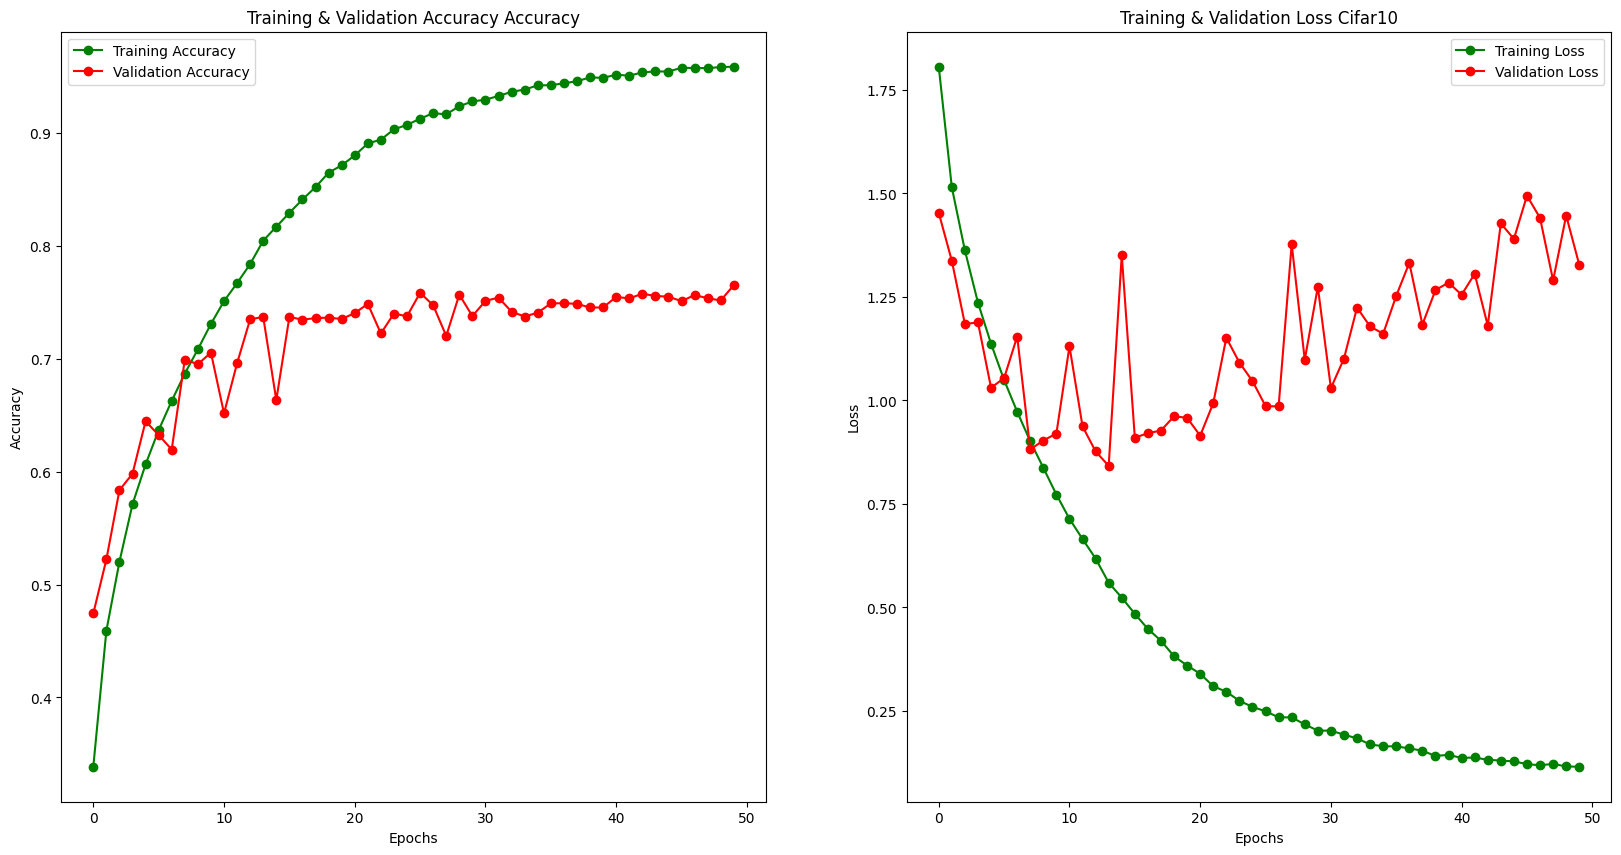

In [33]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = his_cifar10.history['accuracy']
train_loss = his_cifar10.history['loss']
val_acc = his_cifar10.history['val_accuracy']
val_loss = his_cifar10.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss Cifar10')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

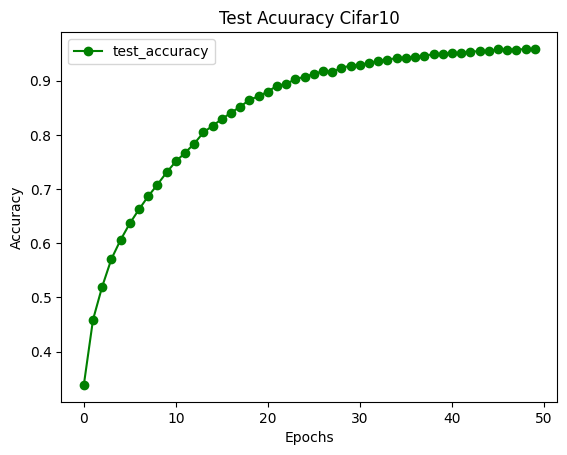

In [11]:
epochs = [i for i in range(50)]
test_acc = his_cifar10.history['test_accuracy']
fig.set_size_inches(20,10)

plt.plot(epochs , train_acc , 'go-' , label = 'test_accuracy')
plt.title("Test Acuuracy Cifar10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.show()

In [12]:
mnist_y_train_enc = (enc.fit_transform(mnist_y_train.reshape(-1,1)))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
model_mnist = tf.keras.Sequential([
    tf.keras.Input(shape = (28,28,1)),

       tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = "same" ,
                           activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2) , padding = "valid" ) ,

    tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3) , strides = (1,1) , padding = "same" ,
                           activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2) , padding = "valid" ) ,
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dropout(0.5), 

    tf.keras.layers.Dense(10, activation='softmax')

])
model_mnist.compile(loss="categorical_crossentropy" ,
                      optimizer = tf.optimizers.SGD(learning_rate=0.002 , momentum=0.9),
                      metrics = ['accuracy'])
my_callbacl = [
             tf.keras.callbacks.EarlyStopping(patience=5)
]

In [14]:
his_mnist = model_mnist.fit(mnist_x_train , mnist_y_train_enc , batch_size = 128 ,
                                epochs = 50 , validation_split = 0.1  ,
                             callbacks=[TestCallback((mnist_x_test,
                                                      enc.fit_transform(mnist_y_test.reshape(-1,1)))),
                                                     json_logging_callback])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
422/422 [==============================] - 7s 13ms/step - loss: 0.2564 - accuracy: 0.9232 - val_loss: 0.0578 - val_accuracy: 0.9843 - test_accuracy: 0.9786
Epoch 2/50
422/422 [==============================] - 6s 13ms/step - loss: 0.0909 - accuracy: 0.9726 - val_loss: 0.0414 - val_accuracy: 0.9882 - test_accuracy: 0.9874
Epoch 3/50
422/422 [==============================] - 5s 12ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0358 - val_accuracy: 0.9897 - test_accuracy: 0.9899
Epoch 4/50
422/422 [==============================] - 6s 13ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0406 - val_accuracy: 0.9888 - test_accuracy: 0.9892
Epoch 5/50
422/422 [==============================] - 6s 14ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0304 - val_accuracy: 0.9922 - test_accuracy: 0.9906
Epoch 6/50
422/422 [==============================] - 6s 13ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0331 - val_accuracy: 0.9913 - test_accuracy: 0.990

In [15]:
_, acc_mnist = model_mnist.evaluate(mnist_x_test, enc.fit_transform(mnist_y_test.reshape(-1,1)), verbose=0)
print(acc_mnist)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9930999875068665


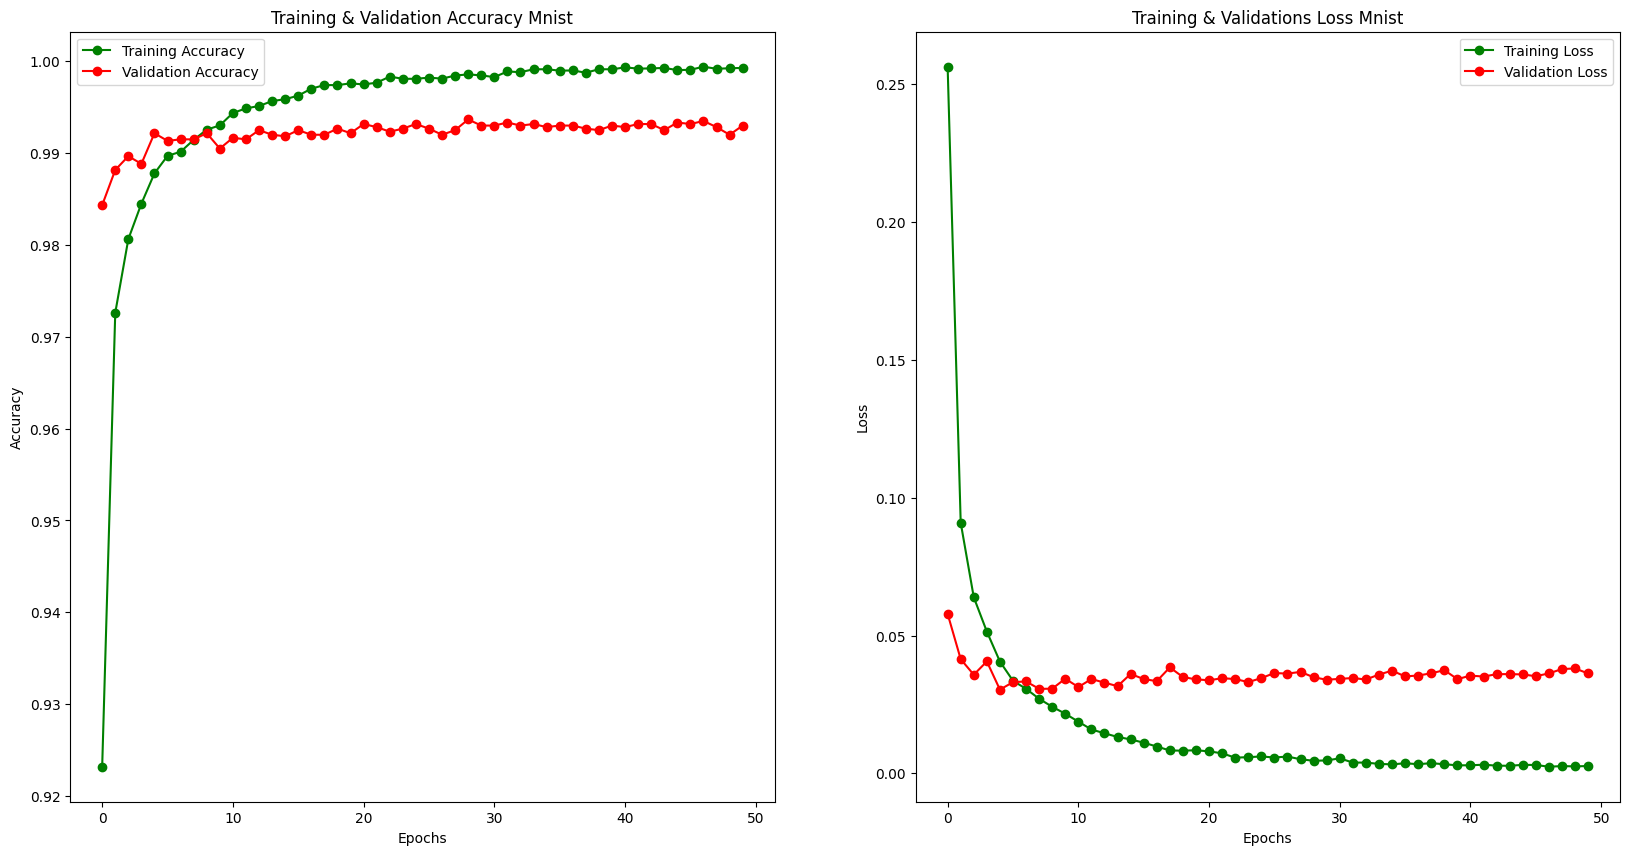

In [32]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = his_mnist.history['accuracy']
train_loss = his_mnist.history['loss']
val_acc = his_mnist.history['val_accuracy']
val_loss = his_mnist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy Mnist')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validations Loss Mnist')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

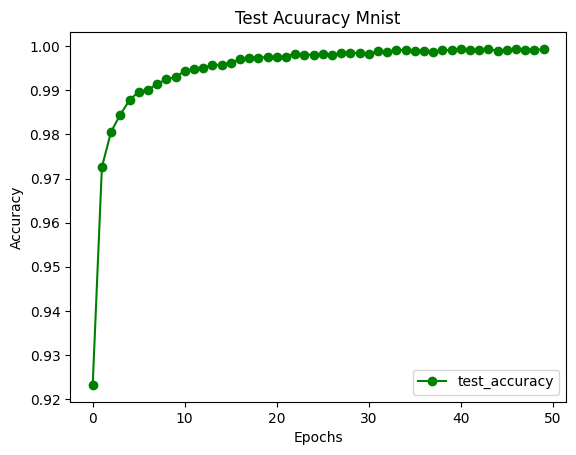

In [17]:
epochs = [i for i in range(50)]
test_acc = his_mnist.history['test_accuracy']
fig.set_size_inches(20,10)

plt.plot(epochs , train_acc , 'go-' , label = 'test_accuracy')
plt.title("Test Acuuracy Mnist")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.show()

In [18]:
model_fashion_mnist = tf.keras.Sequential([
    tf.keras.Input(shape = (28,28,1)),

       tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = "same" ,
                           activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2) , padding = "valid" ) ,

    tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3) , strides = (1,1) , padding = "same" ,
                           activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2) , padding = "valid" ) ,
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dropout(0.5), 

    tf.keras.layers.Dense(10, activation='softmax')

])
model_fashion_mnist.compile(loss="categorical_crossentropy" ,
                      optimizer = tf.optimizers.SGD(learning_rate=0.002 , momentum=0.9),
                      metrics = ['accuracy'])

In [19]:
fashion_mnist_y_train_enc = (enc.fit_transform(fashion_mnist_y_train.reshape(-1,1)))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
his_fashion_mnist = model_fashion_mnist.fit(fashion_mnist_x_train , fashion_mnist_y_train_enc , batch_size = 128 ,
                                epochs = 50 , validation_split = 0.1,
                                callbacks=[TestCallback((fashion_mnist_x_test,
                                                      enc.fit_transform(fashion_mnist_y_test.reshape(-1,1)))),
                                                     json_logging_callback] )

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


422/422 [==============================] - 7s 14ms/step - loss: 0.5121 - accuracy: 0.8201 - val_loss: 0.3182 - val_accuracy: 0.8798 - test_accuracy: 0.8693
Epoch 2/50
422/422 [==============================] - 6s 13ms/step - loss: 0.3528 - accuracy: 0.8733 - val_loss: 0.2818 - val_accuracy: 0.8937 - test_accuracy: 0.8884
Epoch 3/50
422/422 [==============================] - 5s 13ms/step - loss: 0.3065 - accuracy: 0.8867 - val_loss: 0.2687 - val_accuracy: 0.8995 - test_accuracy: 0.8899
Epoch 4/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2762 - accuracy: 0.8989 - val_loss: 0.2427 - val_accuracy: 0.9088 - test_accuracy: 0.9017
Epoch 5/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2545 - accuracy: 0.9072 - val_loss: 0.2681 - val_accuracy: 0.9040 - test_accuracy: 0.8961
Epoch 6/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2338 - accuracy: 0.9137 - val_loss: 0.2463 - val_accuracy: 0.9070 - test_accuracy: 0.9019
Epoch 7/5

In [21]:
_, acc_fashion_mnist = model_fashion_mnist.evaluate(fashion_mnist_x_test, enc.fit_transform(fashion_mnist_y_test.reshape(-1,1)), verbose=0)
print(acc_fashion_mnist)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9269000291824341


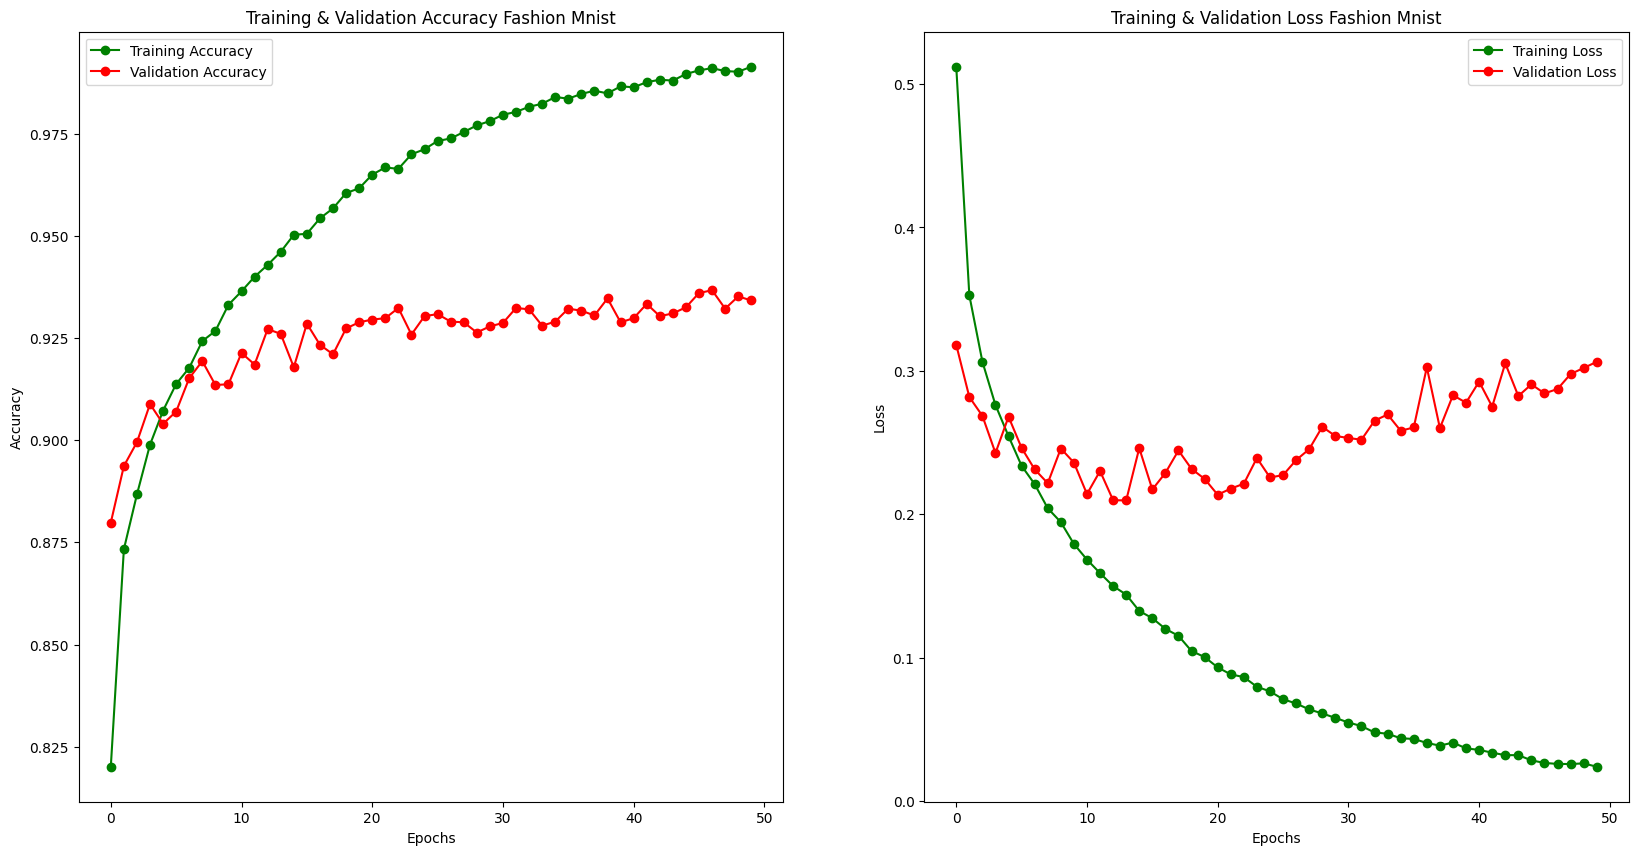

In [34]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = his_fashion_mnist.history['accuracy']
train_loss = his_fashion_mnist.history['loss']
val_acc = his_fashion_mnist.history['val_accuracy']
val_loss = his_fashion_mnist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy Fashion Mnist')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss Fashion Mnist')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

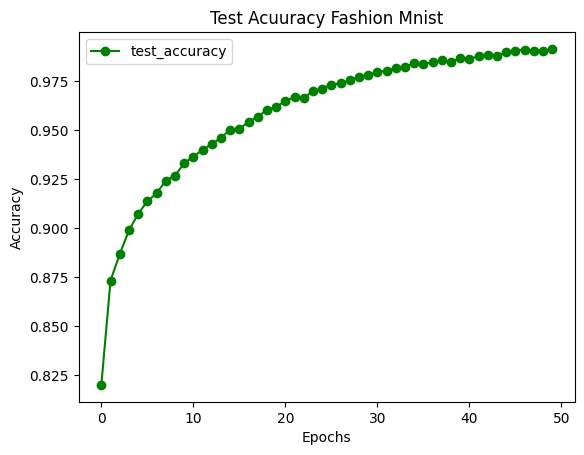

In [23]:
epochs = [i for i in range(50)]
test_acc = his_fashion_mnist.history['test_accuracy']
fig.set_size_inches(20,10)

plt.plot(epochs , train_acc , 'go-' , label = 'test_accuracy')
plt.title("Test Acuuracy Fashion Mnist")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.show()